In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

# Delivery Data

In [5]:
data = pd.read_csv("delivery_time.csv")

In [6]:
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
import statsmodels.formula.api as smf
mod1 = smf.ols("DeliveryTime~SortingTime",data=data).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

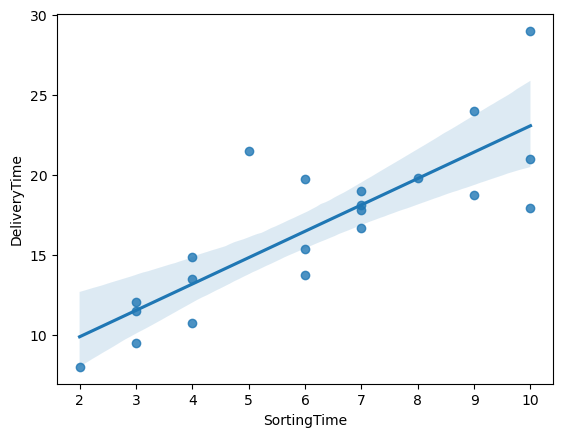

In [8]:
import seaborn as sns
sns.regplot(x="SortingTime", y="DeliveryTime", data=data)

In [9]:
#coeffients
mod1.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [10]:
#t and p-values
print(mod1.tvalues,'\n',mod1.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [11]:
#R squared values
(mod1.rsquared,mod1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [12]:
#predict for 4 and 9 
newdata=pd.Series([5,10 ])

In [13]:
data_pred=pd.DataFrame(newdata, columns=['SortingTime'])

In [14]:
mod1.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

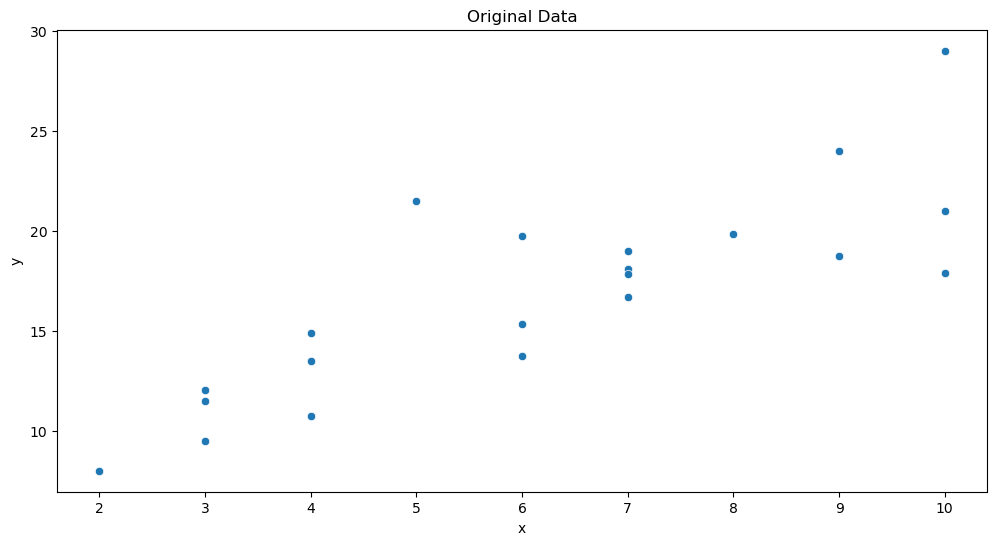

In [19]:
# Plotting the original data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SortingTime', y='DeliveryTime', data=data)
plt.title('Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
# Applying transformations
data['log_X'] = np.log(data['SortingTime'])
data['sqrt_X'] = np.sqrt(data['SortingTime'])
data['square_X'] = np.square(data['SortingTime'])


In [27]:
data['square_X']

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: square_X, dtype: int64

In [25]:
data['log_X']

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: log_X, dtype: float64

In [26]:
data['sqrt_X']

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: sqrt_X, dtype: float64

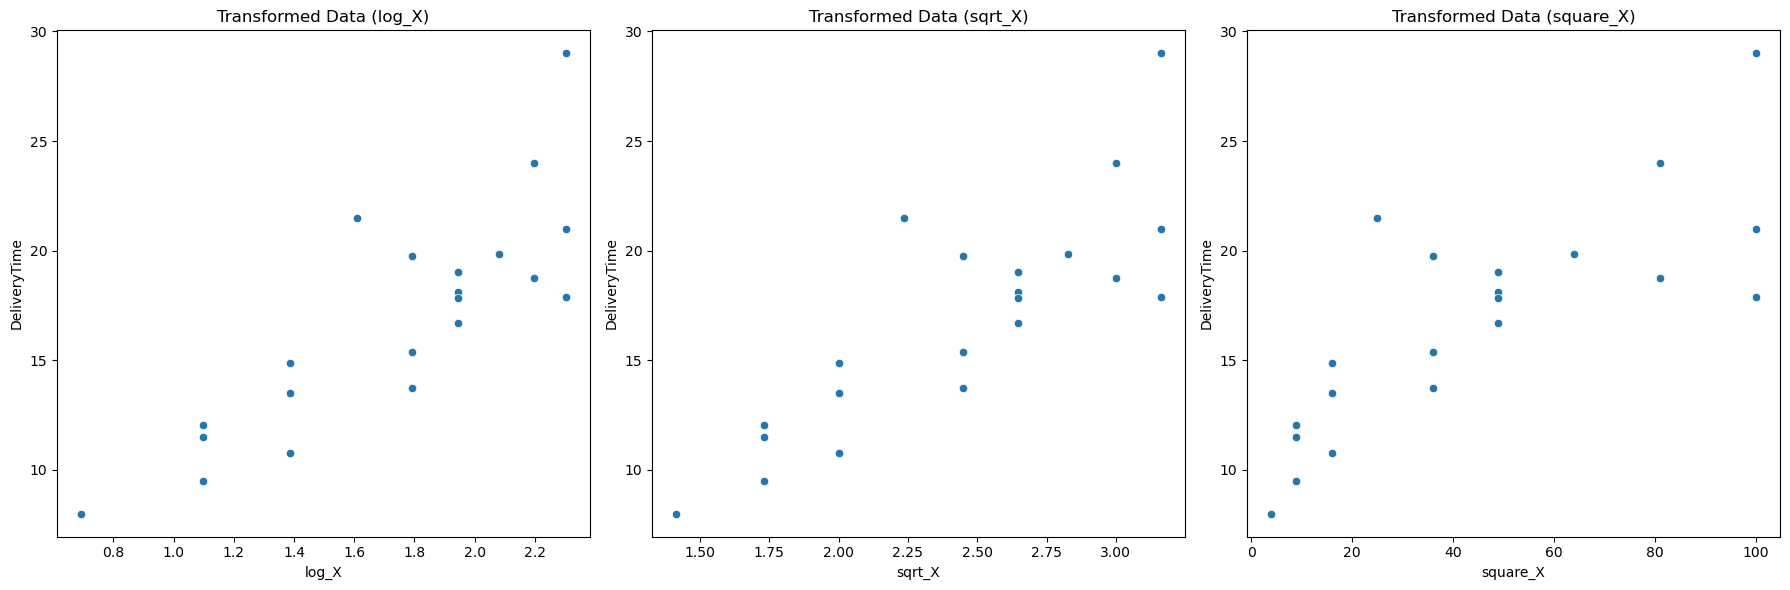

In [30]:
# Plotting transformed data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(['log_X', 'sqrt_X', 'square_X']):
    sns.scatterplot(x=col, y='DeliveryTime', data=data, ax=axes[i])
    axes[i].set_title(f'Transformed Data ({col})')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('DeliveryTime')

plt.tight_layout()
plt.show()

In [33]:
# Calculating RMSE for each transformation
rmse_values = {}
for col in ['log_X', 'sqrt_X', 'square_X']:
    rmse = sqrt(mean_squared_error(data['DeliveryTime'], data[col]))
    rmse_values[col] = rmse

print("RMSE values:")
for col, rmse in rmse_values.items():
    print(f"{col}: {rmse}")

RMSE values:
log_X: 15.74302048343304
sqrt_X: 15.054863463403937
square_X: 39.17746564398614


# salary data


In [35]:
salary = pd.read_csv("Salary_Data.csv")

In [36]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [37]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data=salary).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

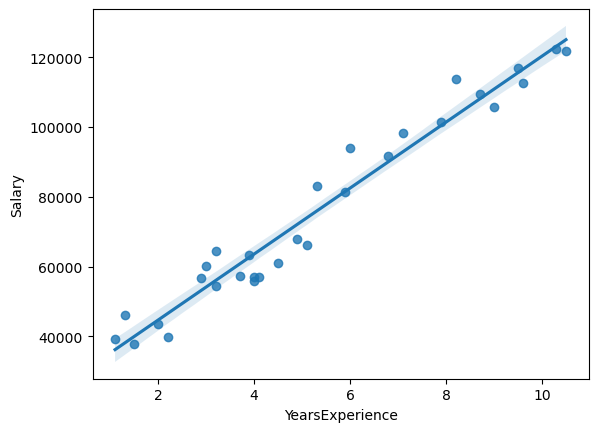

In [38]:
import seaborn as sns
sns.regplot(x="YearsExperience", y="Salary", data=salary)

In [39]:
#coeffients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [40]:
#t and p-values
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [41]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [42]:
#predict for 4 and 9 
newdata=pd.Series([4, 9])

In [43]:
data_pred=pd.DataFrame(newdata, columns=['YearsExperience'])

In [44]:
model.predict(data_pred)

0     63592.049484
1    110841.861092
dtype: float64

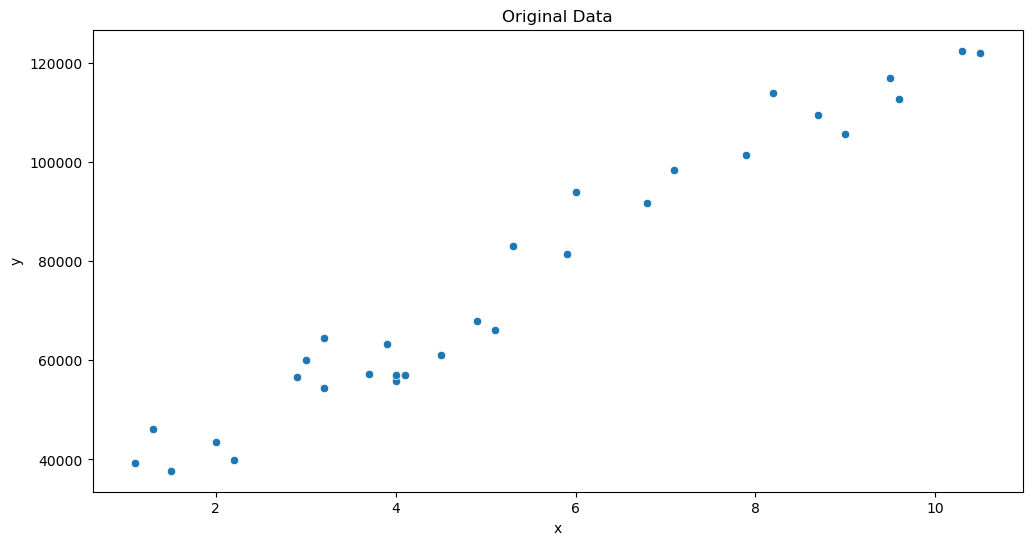

In [45]:
# Plotting the original data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary)
plt.title('Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [48]:
# Applying transformations
salary['log_X'] = np.log(salary['YearsExperience'])
salary['sqrt_X'] = np.sqrt(salary['YearsExperience'])
salary['square_X'] = np.square(salary['YearsExperience'])


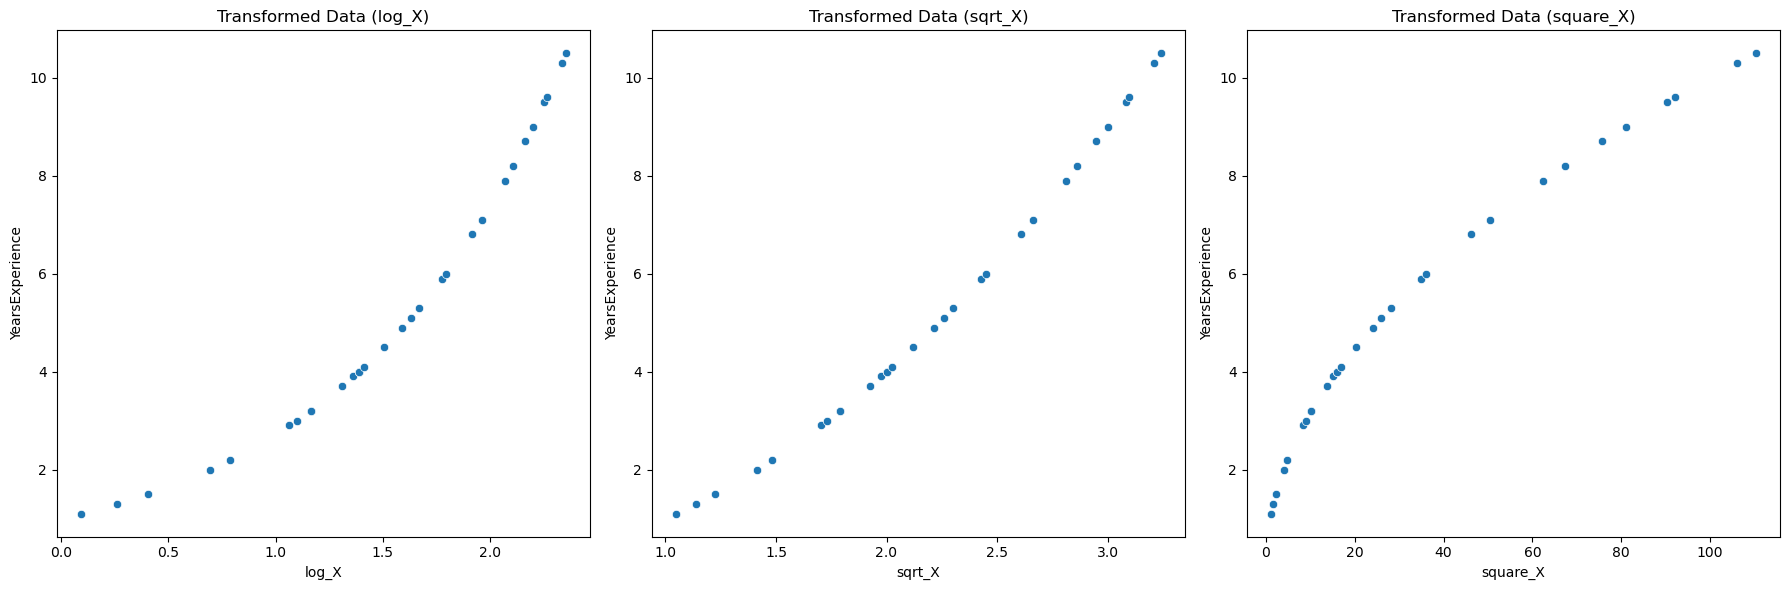

In [50]:
# Plotting transformed data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(['log_X', 'sqrt_X', 'square_X']):
    sns.scatterplot(x=col, y='YearsExperience', data=salary, ax=axes[i])
    axes[i].set_title(f'Transformed Data ({col})')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('YearsExperience')

plt.tight_layout()
plt.show()

In [52]:
# Calculating RMSE for each transformation
rmse_values = {}
for col in ['log_X', 'sqrt_X', 'square_X']:
    rmse = sqrt(mean_squared_error(salary['YearsExperience'], salary[col]))
    rmse_values[col] = rmse

print("RMSE values:")
for col, rmse in rmse_values.items():
    print(f"{col}: {rmse}")

RMSE values:
log_X: 4.404399302744836
sqrt_X: 3.7809890124056147
square_X: 43.2753159048743


In [53]:
#end